<a href="https://colab.research.google.com/github/JUNYA-727/bitcoin_predict/blob/main/bitcoin_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
#日時､始値､高値､安値､終値､出来高
with open('/content/drive/MyDrive/btc.csv') as csvfile:
  reader=csv.reader(csvfile)
  time=[]
  open_price=[]
  high_price=[]
  low_price=[]
  close_price=[]
  volume=[]
  for i in reader:
    time.append(i[0])
    open_price.append(float(i[1]))
    high_price.append(float(i[2]))
    low_price.append(float(i[3]))
    close_price.append(float(i[4]))
    volume.append(float(i[5]))

In [2]:
import datetime
date=[]
for j in time:
  T=(j.split(' ')[0])
  TT=datetime.datetime.strptime(T,'%Y-%m-%d')
  date.append(TT)
print(len(date))

1422


<Figure size 432x288 with 0 Axes>

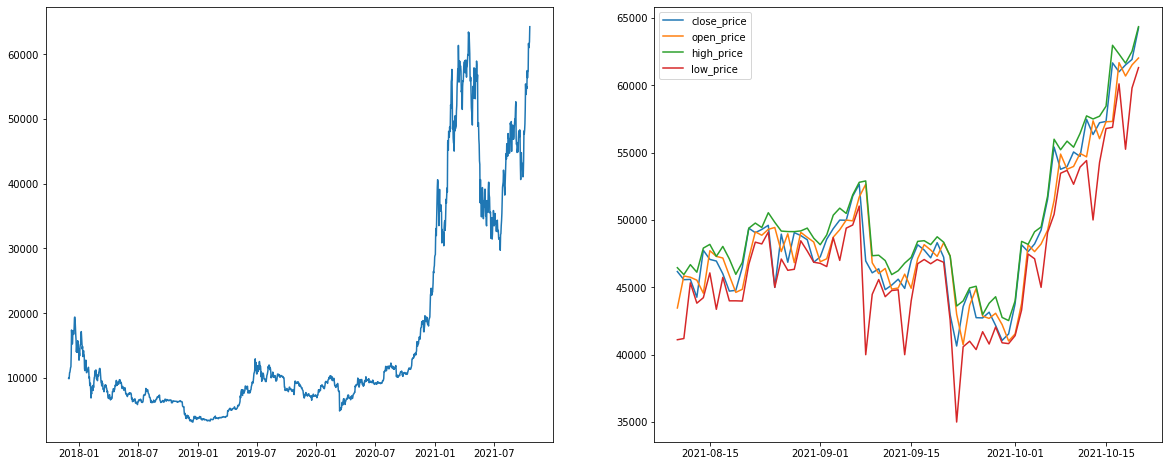

<Figure size 432x288 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib.dates as mdates

fig,ax=plt.subplots(1,2,figsize=(20,8))
ax[0].plot(date,close_price)

time=1350
ax[1].plot(date[time:],close_price[time:],label='close_price')
ax[1].plot(date[time:],open_price[time:],label='open_price')
ax[1].plot(date[time:],high_price[time:],label='high_price')
ax[1].plot(date[time:],low_price[time:],label='low_price')
plt.legend()
plt.figure()

In [4]:
CP=np.array(close_price)
LP=np.array(low_price)
HP=np.array(high_price)
OP=np.array(open_price)
V=np.array(volume)
CP=CP/max(close_price)
LP=LP/max(low_price)
HP=HP/max(high_price)
OP=OP/max(open_price)
V=V/max(volume)

print(len(V))
print(len(OP))

price=[]
for i in range(len(V)):
  a=[]
  a.append(OP[i])
  a.append(HP[i])
  a.append(LP[i])
  a.append(CP[i])
  a.append(V[i])
  price.append(np.array([a]))

1422
1422


In [5]:
print(OP[0],HP[0],LP[0])

0.1538994289855022 0.15436223905768576 0.15671900077430653


In [6]:
#train.test
def create_window(window,split_train):
  train=[]
  test=[]
  len_data=len(price)
  for i in (range(len_data-window)):
    train.append(price[i:i+window])
    test.append(price[i+window])
  x_train,x_test=train[:int(len_data*split_train)],train[int(len_data*split_train):]
  y_train,y_test=test[:int(len_data*split_train)],test[int(len_data*split_train):]
  x_train=np.array(x_train).reshape(len(x_train),window,5)
  x_test=np.array(x_test).reshape(len(x_test),window,5)
  y_train=np.array(y_train).reshape(len(y_train),5)
  y_test=np.array(y_test).reshape(len(y_test),5)
  return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test=create_window(30,0.8)

In [7]:
x_train,x_test,y_train,y_test=create_window(30,0.8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import LearningRateScheduler

model=Sequential()
model.add(LSTM(128,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation('linear'))
model.summary()

def lr_rate(epoch):
  x=0.1
  if epoch>100:
    x=0.01
  if 100<=epoch<200:
    x=0.05
  if 300<=epoch<400:
    x=0.001
  if 400<=epoch<500:
    x=0.005
  if 600<=epoch:
    x=0.00001
  return x
lr=LearningRateScheduler(lr_rate)

adam=SGD(lr_rate)
model.compile(loss='mae',optimizer='sgd')

np.random.seed(2000)
history=model.fit(x_train,y_train,epochs=600,batch_size=32,callbacks=[lr])

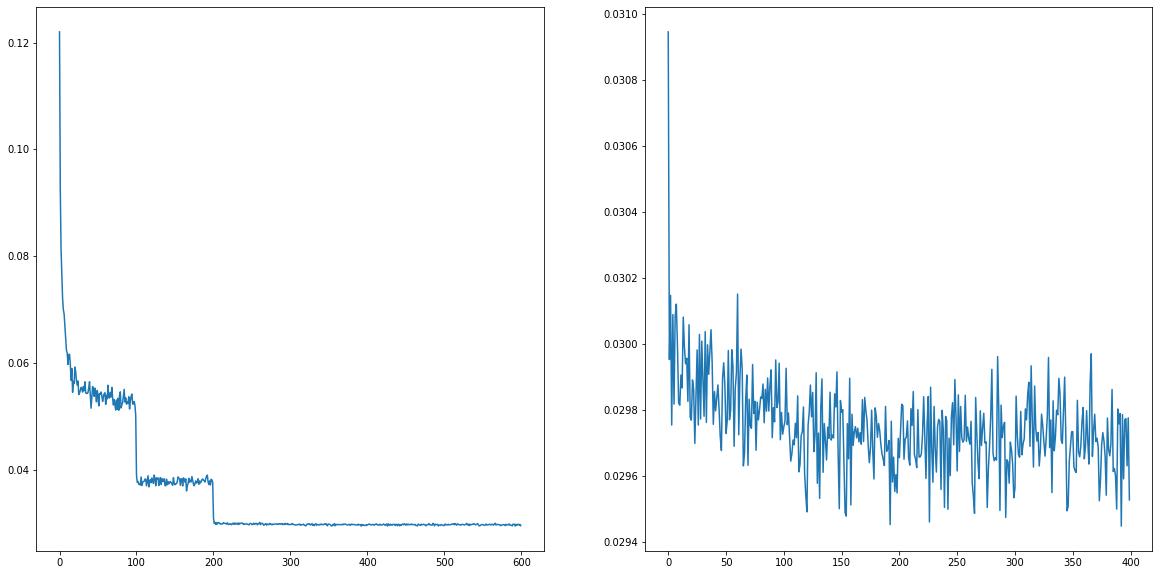

In [13]:
fig,ax=plt.subplots(1,2,figsize=(20,10))
ax[0].plot(history.history['loss'])
ax[1].plot(history.history['loss'][200:])
plt.show()
#右の図で200-300あたりの学習率を採用する

In [ ]:
model=Sequential()
model.add(LSTM(128,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.3))
model.add(Dense(5))
model.add(Activation('linear'))
model.summary()

lr=LearningRateScheduler(lr_rate)

adam=SGD(lr=0.005)
model.compile(loss='mae',optimizer='sgd')

np.random.seed(2000)
history=model.fit(x_train,y_train,epochs=600,batch_size=32)

In [33]:
predict=model.predict(x_test)
predict_close_price=[]
acctualy_close_price=[]
for i in predict:
  predict_close_price.append(i[3]*max(close_price))
for j in y_test:
  acctualy_close_price.append(j[3]*max(close_price))

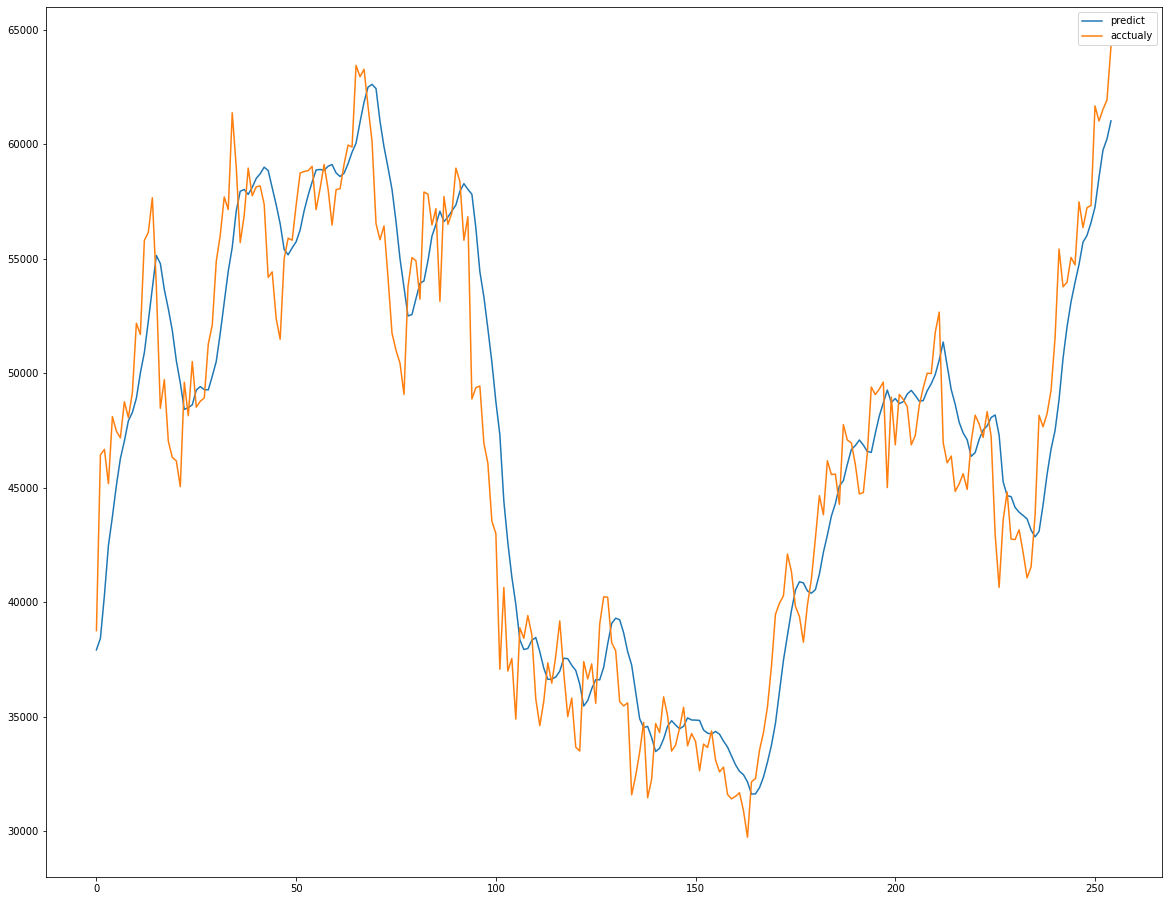

In [35]:
plt.figure(figsize=(20,16))
plt.plot(predict_close_price,label='predict')
plt.plot(acctualy_close_price,label='acctualy')

plt.legend()